In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import FunctionTransformer, OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
import tensorflow as tf
from tensorflow.keras import Model, Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam
import seaborn as sns
from sklearn.decomposition import PCA

In [2]:
def read_data(filename):
    df = pd.read_csv(filename)
    return df

In [3]:
def drop_unused_columns(X, y = None):
    X_ = X.drop(columns=['Cabin', 'Name', 'PassengerId', 'Ticket', 'Embarked', 'SibSp', 'Parch', 'Pclass'])
    return X_

In [4]:
def split_X_y(X):
    X_ = X.drop(columns=['Survived'])
    y = X['Survived']
    return X_, y

In [5]:
def fill_nans(X, y = None):
    X_ = X.copy()
    X_['Age'].fillna(28, inplace=True)
    X_['Fare'].fillna(0, inplace=True)
    return X_

In [6]:
def drop_rows_with_na(X, y = None):
    X_ = X.copy()
    X_.dropna(inplace=True)
    return X_

In [7]:
class Pclass_OHE:
    def __init__(self):
        pass
    def fit(self, X, y=None):
        pass
    def transform(self, X, y=None):
        X_ = X.copy()
        
        X_['Pclass1'] = 0
        X_['Pclass2'] = 0
        X_['Pclass3'] = 0
        
        i = X_[
            X_['Pclass'] == 1
        ].index
        
        X_.loc[i, 'Pclass1'] = 1
        
        i = X_[
            X_['Pclass'] == 2
        ].index
        
        X_.loc[i, 'Pclass2'] = 1
        
        i = X_[
            X_['Pclass'] == 3
        ].index
        
        X_.loc[i, 'Pclass3'] = 1
        
        X_.drop(columns='Pclass', inplace=True)
        
        return X_
    def fit_transform(self, X, y=None):
        self.fit(X)
        return self.transform(X)

In [8]:
class Sex_OHE:
    def __init__(self):
        pass
    def fit(self, X, y=None):
        pass
    def transform(self, X, y=None):
        X_ = X.copy()
        
        X_['Male'] = 0
        X_['Female'] = 0
        
        i = X_[
            X_['Sex'] == 'male'
        ].index
        
        X_.loc[i, 'Male'] = 1
        
        i = X_[
            X_['Sex'] == 'female'
        ].index
        
        X_.loc[i, 'Female'] = 1
        
        X_.drop(columns='Sex', inplace=True)
        
        return X_
    def fit_transform(self, X, y=None):
        self.fit(X)
        return self.transform(X)

In [9]:
class Embarked_OHE:
    def __init__(self):
        pass
    def fit(self, X, y=None):
        pass
    def transform(self, X, y=None):
        X_ = X.copy()
        
        X_['Embarked_S'] = 0
        X_['Embarked_C'] = 0
        X_['Embarked_Q'] = 0
        
        i = X_[
            X_['Embarked'] == 'S'
        ].index
        
        X_.loc[i, 'Embarked_S'] = 1
        
        i = X_[
            X_['Embarked'] == 'C'
        ].index
        
        X_.loc[i, 'Embarked_C'] = 1
        
        i = X_[
            X_['Embarked'] == 'Q'
        ].index
        
        X_.loc[i, 'Embarked_Q'] = 1
        
        X_.drop(columns='Embarked', inplace=True)
        
        return X_
    def fit_transform(self, X, y=None):
        self.fit(X)
        return self.transform(X)

In [10]:
# FUNCTION TRANSFORMERS
drop_cols = FunctionTransformer(drop_unused_columns)
fill_na = FunctionTransformer(fill_nans)
drop_rows = FunctionTransformer(drop_rows_with_na)
split_xy = FunctionTransformer(split_X_y)

In [11]:
pipeline = Pipeline([
    ('drop_cols', drop_cols),
    ('fill_na', fill_na),
    ('gender_transformer', Sex_OHE())
])

In [12]:
df = read_data('train.csv')

test_data = pipeline.fit_transform(df)
X, y = split_xy.fit_transform(test_data)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=True)

In [13]:
# RANDOM FOREST CLASSIFIER
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)

accuracy_score(y_test, y_pred)

0.7777777777777778

In [14]:
# LOGISTIC REGRESSION CLASSIFIER
logistic_regression = LogisticRegression(max_iter=500)
logistic_regression.fit(X_train, y_train)
y_pred = logistic_regression.predict(X_test)

accuracy_score(y_test, y_pred)

0.8

In [15]:
# ADA BOOST CLASSIFIER
ada_boost = AdaBoostClassifier(n_estimators=200)
ada_boost.fit(X_train, y_train)
y_pred = ada_boost.predict(X_test)

accuracy_score(y_test, y_pred)

0.7777777777777778

In [16]:
# SVC CLASSIFIER
svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

accuracy_score(y_test, y_pred)

0.6222222222222222

In [17]:
# TENSORFLOW NEURAL NETWORK CLASSIFIER
def create_nn_model():
    inputs = Input(shape=(4,))
    x = Dense(128, activation='relu')(inputs)
    x = Dense(64, activation='relu')(x)
    outputs = Dense(2, activation='softmax')(x)
    
    model = Model(inputs=[inputs], outputs=[outputs])
    model.compile(optimizer=Adam(lr=0.01), loss='mse', metrics=['accuracy'])
    
    return model

nn = create_nn_model()

In [18]:
nn.fit(X_train, y_train, verbose=0, epochs=30, batch_size=32)

In [19]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [39]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [41]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

ConversionError: Failed to convert value(s) to axis units: 0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: x, Length: 891, dtype: object

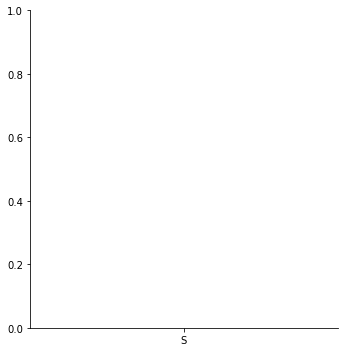

In [40]:
sns.displot(data=df, x='Embarked', hue='Survived')

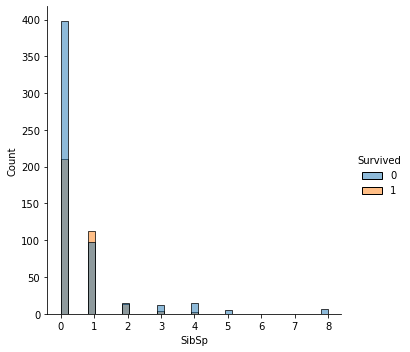

In [28]:
sns.displot(data=df, x='SibSp', hue='Survived')

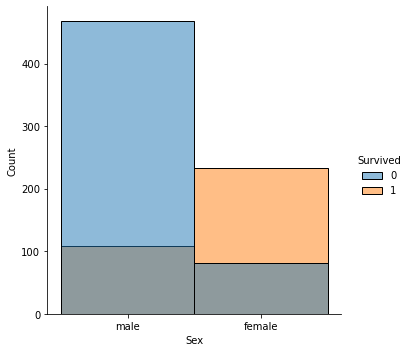

In [20]:
sns.displot(data=df, x='Sex', hue='Survived')

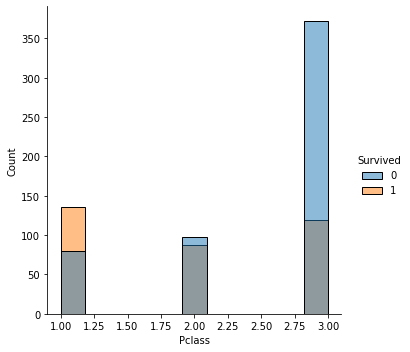

In [27]:
sns.displot(data=df, x='Pclass', hue='Survived')

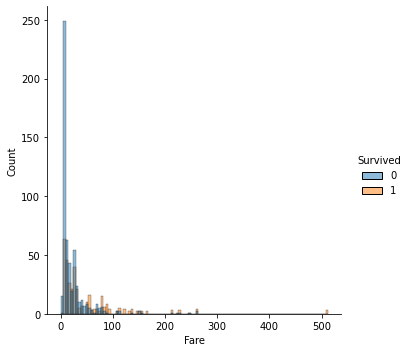

In [77]:
sns.displot(data=df, x='Fare', hue='Survived')

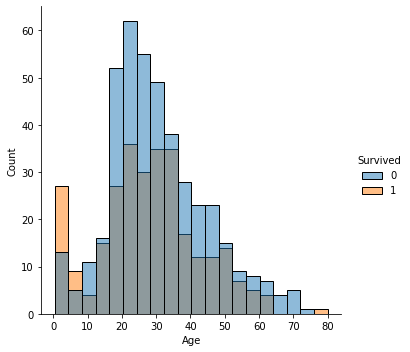

In [78]:
sns.displot(data=df, x='Age', hue='Survived')

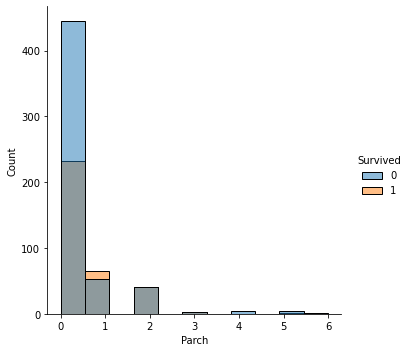

In [24]:
sns.displot(data=df, x='Parch', hue='Survived')

In [98]:
# TEST SET
df = read_data('test.csv')
test_data = pipeline.fit_transform(df)
#test_data = scaler.transform(test_data)
y_pred = ada_boost.predict(test_data)

In [99]:
# CREATE CSV
ids = df['PassengerId'].to_list()
survived = y_pred.tolist()

dictionary_data = {
    'PassengerId': ids,
    'Survived': survived
}

csv_file = pd.DataFrame(dictionary_data)

csv_file.to_csv('prediction.csv', index=False)